In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Linear regression estimator
from sklearn.model_selection import train_test_split # Train/test splitting
np.random.seed(1)  # Set the random seed for reproduceability

In [208]:
df = pd.read_csv("data_clean_with_dummies.csv")
df = df.set_index('date')
df = df.drop(["time", "Unnamed: 0"], axis = 1)

In [209]:
#Standardize our temperature Data 
standardize = lambda x: (x - x.mean()) / x.std()
df["temperature in ºc"] = standardize(df["temperature in ºc"])

In [210]:
#Features of our dataset
X = df[df.columns[1:]]
# Output to predict
y = df["pedestrians count"]
type(X)
X.shape

(15358, 54)

In [211]:
# Split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)

In [212]:
#Start with the linear regression Model
linreg = LinearRegression()
#Fit our train data on the linear regression Model
linreg.fit(Xtrain, ytrain)

LinearRegression()

In [189]:
#Prediction on the Data we trained the LR 
#List to hold the predictions of the LR on the train data
#Pred_train = [] 
#Predict the pedestrian count 
#Pred_train = linreg.predict(Xtrain)

In [190]:
#Prediction on the test Data
#List to hold the predictions of the LR on the test data
#Pred_test = []
#Predict the pedestrian count on the test data
#Pred_test = linreg.predict(Xtest)

In [213]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr_mae_train = mean_absolute_error(ytrain, linreg.predict(Xtrain))
lr_mae_test = mean_absolute_error(ytest, linreg.predict(Xtest))

In [215]:
print("----- Training data MAE -----")
print(f"Linear regression MAE : {lr_mae_train:>10.2f}")

print() # Empty line
print("----- Validation data MAE -----")
print(f"Linear regression MAE : {lr_mae_test:>10.2f}")


----- Training data MAE -----
Linear regression MAE :    1002.38

----- Validation data MAE -----
Linear regression MAE :    1004.27


In [216]:
print(linreg.score(Xtest, ytest))
print(f"constant: {linreg.intercept_:.2f}, coefficient: {linreg.coef_[0]:.2f}.")


0.7883433656670237
constant: -19545385305135396.00, coefficient: -18.88.


In [252]:
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

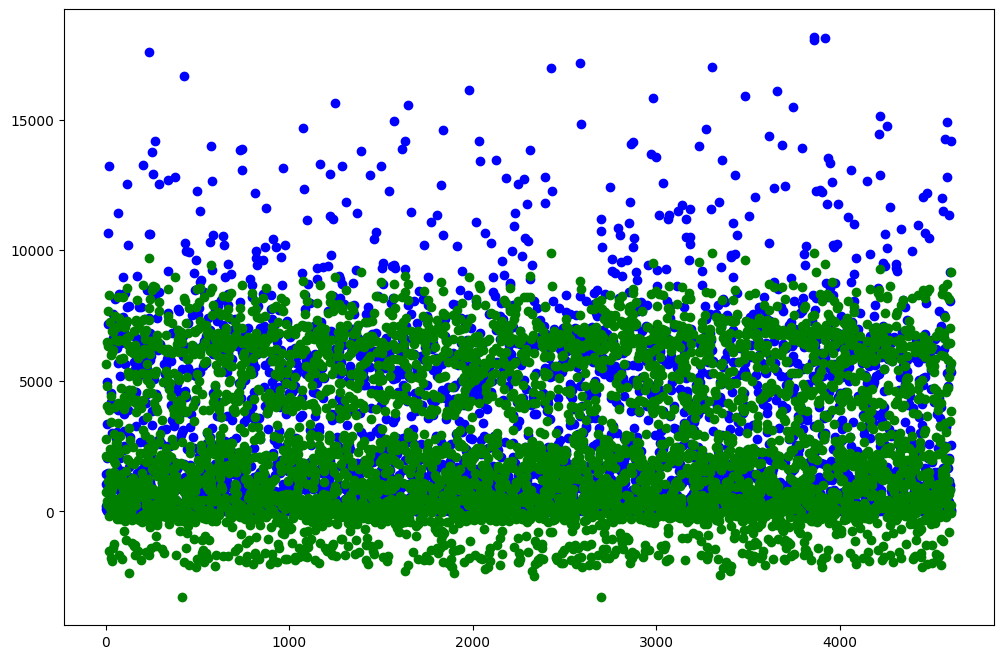

test count     4608.000000
mean      2591.601780
std       3261.570796
min          0.000000
25%        138.000000
50%        943.500000
75%       4776.000000
max      18153.000000
Name: pedestrians count, dtype: float64 AND <class 'pandas.core.series.Series'> und pred count    4608.000000
mean     2635.945312
std      2907.151982
min     -3284.000000
25%       240.000000
50%      1828.000000
75%      5382.000000
max      9908.000000
dtype: float64


In [259]:
fig, ax = plt.subplots(figsize=(12, 8))

ypred = linreg.predict(Xtest)

ypred = pd.Series(ypred) 

plt.scatter(xs, ytest, color ='b')

plt.scatter(xs, ypred, color ='green')

plt.show()

print(f"test {ytest.describe()} AND {type(ytest)} und pred {ypred.describe()}")
# Data scatter of predicted values

In [258]:
sns.pairplot(xs, ytest, data=(ytest, xs), color="blue")
sns.pairplot(xs, ypred, data=(ypred, xs), color="green")
plt.show()


TypeError: pairplot() got multiple values for argument 'data'